# 2020 Elections

# הסבר כללי על מבנה מחברת העבודה שעשיתי:
# .חלק 1 - ביצוע התאמות בין הנתונים של בחירות שנת 2020 לקוד שהוצג בכיתה
# חלק 2 - פתרון העבודה שניתנה בכיתה עבור בחירות 2015, מיושם עבור נתוני 2020, כולל סעיף הבונוס של שימוש בתוכנת gephi.
# חלק 3 - חלק יצירתי וחדשני.


# חלק 1
בחלק זה ביצעתי התאמות של נתוני בחירות 2020 לקוד שניתן בכיתה בעבור בחירות 2015. בין הדברים שהייתי צריך להתמודד איתם ולבצע שינויים בעקבותם היה נתונים בשפה העברית, ביצוע מעבר מרשימת אותיות של כל מפלגה לשם המפלגה, סידורי ויזואליזציה בגרפים כך שיתאימו לנתונים של שנת 2020 והתמודדות עם דטה בייס במבנה לא זהה לדטה בייס של שנת 2015 בדגש על השוני בחלק מהעמודות ביניהם, כך שהיה צורך בהתאמות בכדי להציג את המידע הנכון.

# Imports

In [1]:
!pip install --upgrade git+https://github.com/goolig/dsClass.git
from dsClass.path_helper import *
import dsClass

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-3los7m_3
Requirement not upgraded as not directly required: pydotplus in /opt/conda/lib/python3.6/site-packages (from dsClass==1.0.27) (2.0.2)
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from pydotplus->dsClass==1.0.27) (2.2.0)
  Running setup.py bdist_wheel for dsClass ... - \ | / - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-m03tl9ju/wheels/c7/a9/03/023d8da4b4e004497715eeb1ea9b5d914ad425036bb4bc10b8
Successfully built dsClass
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement keras-applications>=1.0.5, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.10.0 has requirement keras-preprocessing>=1.0.3, but you'll have keras-preprocessing 1.0.2 which is incompatible.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have num

In [2]:
import pandas as pd
import itertools
from datetime import timedelta
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns
sns.set_context("poster")
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold' 

from IPython.display import display, HTML

import numpy as np
import math

import datetime
import time
import sys

import networkx as nx


import sklearn
print("sklearn.__version__:",sklearn.__version__)

import pylab as pl
import matplotlib.dates as mdates

#print('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
print(sys.version)
from dsClass.path_helper import *

sklearn.__version__: 0.21.dev0
3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]


# Data Import

In [3]:
df = pd.read_csv('../input/election-2020-booth/booth_election_2020.csv', encoding='iso-8859-8')

# Parties names dictionary from hebrew party vote card name to english party name. e.g. 'מחל'-> 'Likud'.
parties_dic =  pd.read_excel('../input/party-names-2020/parties_names.xlsx').set_index('Parties_in_hebrew')['Parties_in_english'].to_dict()
print ("original: \n ",df.columns)
# Replacing party vote card name to its regular party name. 
df = df.rename(columns=parties_dic)

# Creating copy of basic data for creative part.
df_copy_for_district_part = df.copy()

print("Columns:")
print(df.columns)
print()
print("df shape:",df.shape)
df.head(5)


original: 
  Index(['Committee symbol', 'Barzel', 'Settlement_name', 'Settlement_code',
       'Booth_number', 'Concentration', 'judge', 'Registered_voters', 'votes',
       'bad_votes', 'proper_votes', 'אמת', 'ג', 'ודעם', 'ז', 'זך', 'זץ', 'טב',
       'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ', 'כן', 'ל', 'מחל', 'נ', 'נז',
       'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס'],
      dtype='object')
Columns:
Index(['Committee symbol', 'Barzel', 'Settlement_name', 'Settlement_code',
       'Booth_number', 'Concentration', 'judge', 'Registered_voters', 'votes',
       'bad_votes', 'proper_votes', 'Labor–Gesher–Meretz',
       'United Torah Judaism', 'Joint List', 'Otzma Liberalit Kalkalit ',
       'Peula LeYisrael', 'Tzomet ', 'Yamina', 'HaHazon',
       'Uncorrupted Red White', 'HaBrit HaMeshutefet', 'Kavod HaAdam ',
       'Bible Bloc Party ', 'Social Leadership', 'HaLev HaYehudi', 'Ani VeAta',
       'Yisrael Beiteinu', 'Likud', 'Kol HaNashim', 'Koah Lehashpi'a ',
      

,Committee symbol,Barzel,Settlement_name,Settlement_code,Booth_number,Concentration,judge,Registered_voters,votes,bad_votes,proper_votes,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Otzma Liberalit Kalkalit,Peula LeYisrael,Tzomet,Yamina,HaHazon,Uncorrupted Red White,HaBrit HaMeshutefet,Kavod HaAdam,Bible Bloc Party,Social Leadership,HaLev HaYehudi,Ani VeAta,Yisrael Beiteinu,Likud,Kol HaNashim,Koah Lehashpi'a,Kama – Advancing the Status of the Individual,Otzma Yehudit,Mitkademet,Blue and White,Pirate Party,Da'am: Green Economy – One State,Zekhuyoteinu BeKoleinu,Shema,Seder Hadash,Mishpat Tzedek,Shas
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,124,2,0,112,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0,0,0,2
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,247,6,0,235,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0
2,18,9872,אבו גווייעד שבט,967,3.0,1,0,669,220,2,218,5,0,207,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0
3,2,736,אבו גוש,472,1.0,1,0,530,299,7,292,15,1,229,0,0,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,11,0,0,0,0,0,0,2
4,2,737,אבו גוש,472,2.0,1,0,693,388,6,382,6,0,330,0,0,0,0,0,0,2,0,0,0,0,0,2,23,0,0,0,0,0,18,0,0,0,0,0,1,0


# Clean Data

In [4]:
# clean NA.
result_df = df.dropna(axis=0, how='any')
result_df = result_df[result_df.votes > 0]
result_df.loc[result_df.Registered_voters == 0,'Registered_voters'] = result_df[result_df.Registered_voters == 0].votes
result_df.shape

(11179, 41)

# Overall Votes Per Party

In [5]:
block_percent = 0.0325

all registerd voters: 6783464
all_votes: 4590062
vote percentage: 0.6766545823785606


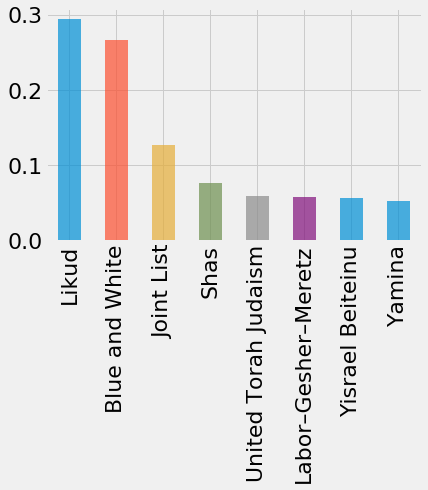

In [6]:
all_registered_voters = result_df.Registered_voters.sum()
all_votes = result_df.proper_votes.sum()
print("all registerd voters:",all_registered_voters)
print("all_votes:",all_votes)
print("vote percentage:",all_votes/all_registered_voters)
overall_votes_per_party = result_df.iloc[:,11:].sum()
percantage_vote_per_pary = overall_votes_per_party/all_votes
percantage_vote_per_pary = percantage_vote_per_pary[percantage_vote_per_pary.values>block_percent]
percantage_vote_per_pary.sort_values(ascending=False).plot.bar(alpha=0.7)

# Group by City and Filter Out Small Parties

In [7]:
# Print the large parties.
large_parties = percantage_vote_per_pary.index.values
print(large_parties)

['Labor–Gesher–Meretz' 'United Torah Judaism' 'Joint List' 'Yamina'
 'Yisrael Beiteinu' 'Likud' 'Blue and White' 'Shas']


In [8]:
non_party_col = list(result_df.iloc[:,0:11].columns)
int_columns = []
int_columns.extend(non_party_col)
int_columns.extend(list(large_parties))
print(int_columns)

['Committee symbol', 'Barzel', 'Settlement_name', 'Settlement_code', 'Booth_number', 'Concentration', 'judge', 'Registered_voters', 'votes', 'bad_votes', 'proper_votes', 'Labor–Gesher–Meretz', 'United Torah Judaism', 'Joint List', 'Yamina', 'Yisrael Beiteinu', 'Likud', 'Blue and White', 'Shas']


In [9]:
res_work_df = result_df.copy()
res_work_df = res_work_df[int_columns]
res_work_df_city = res_work_df.groupby(['Settlement_name','Settlement_code'])[int_columns[4:]].sum().reset_index()
print(res_work_df_city.shape)
res_work_df_city.head(5)

(1214, 17)


,Settlement_name,Settlement_code,Booth_number,Concentration,judge,Registered_voters,votes,bad_votes,proper_votes,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas
0,אבו גווייעד שבט,967,6.0,3,0,2018,595,6,589,13,0,554,0,1,4,8,2
1,אבו גוש,472,36.0,17,0,4821,2718,36,2682,75,4,2157,5,5,280,123,14
2,אבו סנאן,473,91.0,43,1,9422,6090,53,6037,92,6,4458,16,230,190,752,247
3,אבו עבדון שבט,958,1.0,1,0,142,41,1,40,0,0,40,0,0,0,0,0
4,אבו קורינאת שבט,968,10.0,4,0,3037,1336,8,1328,9,0,1263,1,0,8,33,0


# Remove low votings rates

In [10]:
min_vote_rate = 0.6
min_proper_votes = 300

In [11]:
res_work_df = res_work_df_city.copy()
res_work_df['vote_rate'] = res_work_df.proper_votes / res_work_df.Registered_voters
res_work_df = res_work_df[(res_work_df.vote_rate > min_vote_rate) & (res_work_df.proper_votes > min_proper_votes)]
print(res_work_df.shape)
res_work_df.sample(10)

(783, 18)


,Settlement_name,Settlement_code,Booth_number,Concentration,judge,Registered_voters,votes,bad_votes,proper_votes,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas,vote_rate
388,חדיד,618,1.0,1,0,600,486,0,486,11,16,1,22,3,295,77,53,0.810000
596,כפר שמריהו,267,6.0,7,0,1904,1238,3,1235,113,6,5,22,33,222,823,6,0.648634
508,כוכב יעקב,3779,28.0,19,0,4325,3532,16,3516,3,731,1,503,4,719,15,1450,0.812948
188,בית שקמה,747,1.0,1,0,570,440,0,440,13,4,0,9,8,279,35,87,0.771930
829,ניר בנים,553,1.0,1,0,605,443,0,443,73,4,1,5,5,45,308,0,0.732231
164,בית חנן,159,1.0,1,0,521,402,0,402,52,0,2,8,10,60,268,2,0.771593
147,בית אריה,3652,123.0,107,0,3633,2648,7,2641,59,24,1,238,109,1453,631,95,0.726947
125,באר אורה,21,1.0,1,0,593,446,1,445,34,2,6,12,38,139,197,16,0.750422
562,כפר טרומן,673,1.0,1,0,572,438,1,437,31,2,2,20,11,131,231,6,0.763986
33,אום אלקוטוף,2024,1.0,1,0,717,580,1,579,10,0,558,1,0,4,2,0,0.807531


In [12]:
res_work_df[res_work_df.Settlement_name.str.contains("באר שבע|תל אביב  יפו|ירושלים")] # BE'ER SHEVA / TEL AVIV / JERUSALEM 

,Settlement_name,Settlement_code,Booth_number,Concentration,judge,Registered_voters,votes,bad_votes,proper_votes,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas,vote_rate
129,באר שבע,9000,44150.5,16772,4,161968,100051,785,99266,3329,1360,770,4442,11804,49801,17984,8860,0.612874
494,ירושלים,3000,299679.9,108947,13,415991,263214,1625,261589,12919,63782,5321,20701,6183,72601,32800,44649,0.628833
1189,תל אביב יפו,5000,300080.4,76447,29,434208,268116,1001,267115,38808,2802,11413,5942,8598,58363,128637,11179,0.615178


## Check if there bad rows with infinite values

In [13]:
res_work_df[res_work_df.vote_rate == np.inf]

,Settlement_name,Settlement_code,Booth_number,Concentration,judge,Registered_voters,votes,bad_votes,proper_votes,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas,vote_rate


# Calculate percentage votes for each city-party

In [14]:
res_work_df_percentage_votes = res_work_df.iloc[:,9:-1].div(res_work_df.proper_votes, axis=0)
res_work_df_percentage_votes.head(5)

,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas
2,0.015239,0.000994,0.738446,0.002650,0.038098,0.031473,0.124565,0.040914
8,0.000000,0.000000,0.984321,0.001742,0.000000,0.000000,0.005226,0.003484
9,0.003475,0.000000,0.964379,0.000869,0.000869,0.006950,0.015639,0.000869
11,0.118644,0.009685,0.014528,0.021792,0.016949,0.259080,0.544794,0.007264
13,0.128099,0.000000,0.000000,0.064050,0.008264,0.113636,0.673554,0.012397


# Clustering

In [15]:
res_work_df_percentage_votes_transpose = res_work_df_percentage_votes.transpose()
res_work_df_percentage_votes_transpose.head(11)

,2,8,9,11,13,14,15,16,18,20,21,22,23,28,29,32,33,36,37,39,40,41,42,43,46,48,51,52,53,54,55,58,59,60,62,64,65,67,71,72,...,1151,1152,1154,1156,1157,1158,1159,1160,1161,1162,1164,1165,1166,1167,1169,1170,1171,1173,1174,1176,1177,1178,1181,1183,1187,1189,1191,1192,1193,1199,1202,1203,1204,1205,1206,1207,1208,1209,1210,1213
Labor–Gesher–Meretz,0.015239,0.000000,0.003475,0.118644,0.128099,0.111869,0.012121,0.071910,0.096128,0.054441,0.005096,0.012862,0.002270,0.031863,0.136808,0.003927,0.017271,0.144330,0.016706,0.238806,0.029785,0.019049,0.064892,0.138801,0.043840,0.050680,0.066820,0.007905,0.051661,0.010782,0.000000,0.309446,0.211966,0.302100,0.065574,0.077670,0.000000,0.003993,0.246330,0.001401,...,0.222698,0.000000,0.026686,0.326923,0.015291,0.276074,0.164323,0.081505,0.270358,0.002641,0.006270,0.076017,0.290411,0.418764,0.021769,0.281746,0.047085,0.012978,0.036585,0.130435,0.256184,0.291280,0.029081,0.079470,0.095238,0.145286,0.149515,0.062906,0.087692,0.125483,0.046908,0.094340,0.004484,0.186020,0.064815,0.091691,0.001155,0.012077,0.017337,0.019108
United Torah Judaism,0.000994,0.000000,0.000000,0.009685,0.000000,0.002729,0.030303,0.002247,0.006762,0.000000,0.034395,0.016077,0.022701,0.009804,0.001629,0.000045,0.000000,0.000000,0.151107,0.000000,0.010462,0.013383,0.006656,0.000000,0.007307,0.011362,0.001536,0.015810,0.003690,0.006739,0.032290,0.000000,0.003419,0.001616,0.003279,0.009709,0.104072,0.000307,0.000000,0.037815,...,0.000000,0.018519,0.006313,0.000000,0.024465,0.003067,0.003701,0.006270,0.000000,0.001056,0.078370,0.006424,0.000000,0.002288,0.007823,0.001323,0.008969,0.000210,0.002439,0.002899,0.000000,0.005566,0.006567,0.000000,0.000000,0.010490,0.000000,0.005642,0.012308,0.003861,0.000000,0.000000,0.065022,0.003382,0.006944,0.005731,0.763279,0.012077,0.020433,0.014862
Joint List,0.738446,0.984321,0.964379,0.014528,0.000000,0.009550,0.000000,0.008989,0.003713,0.000000,0.000000,0.003215,0.000000,0.000000,0.006515,0.985274,0.963731,0.002577,0.001237,0.006397,0.000854,0.001172,0.000000,0.000000,0.000406,0.003588,0.000000,0.000000,0.005535,0.000000,0.000000,0.006515,0.003419,0.014540,0.000000,0.000000,0.000000,0.980805,0.004894,0.000000,...,0.008565,0.000000,0.002582,0.006410,0.003058,0.009202,0.001480,0.000000,0.003257,0.980459,0.000000,0.001071,0.005479,0.009153,0.001361,0.011905,0.004484,0.830969,0.000000,0.005797,0.019435,0.007421,0.000000,0.003311,0.008658,0.042727,0.001942,0.001693,0.007692,0.007722,0.000000,0.000000,0.004484,0.007892,0.000000,0.002865,0.000000,0.000000,0.001858,0.000000
Yamina,0.002650,0.001742,0.000869,0.021792,0.064050,0.020464,0.045455,0.074157,0.026783,0.037249,0.380892,0.508039,0.454030,0.120098,0.014658,0.000312,0.001727,0.010309,0.039324,0.010661,0.027010,0.031455,0.043261,0.025237,0.116907,0.034534,0.035330,0.088933,0.025830,0.016173,0.090998,0.006515,0.018803,0.027464,0.052459,0.016181,0.615385,0.000154,0.017945,0.691877,...,0.027837,0.064815,0.035294,0.008547,0.406728,0.018405,0.026647,0.194357,0.016287,0.000528,0.697492,0.026767,0.010959,0.000000,0.205102,0.005291,0.159193,0.000683,0.129268,0.014493,0.021201,0.012987,0.056285,0.066225,0.019481,0.022245,0.021359,0.049647,0.038462,0.038610,0.038380,0.070081,0.078475,0.011274,0.037037,0.088825,0.008083,0.393720,0.470588,0.180467
Yisrael Beiteinu,0.038098,0.000000,0.000869,0.016949,0.008264,0.017735,0.012121,0.047191,0.025192,0.028653,0.000000,0.003215,0.000000,0.002451,0.030945,0.000178,0.000000,0.015464,0.076860,0.023454,0.019056,0.112435,0.021631,0.018927,0.039578,0.047391,0.063748,0.005929,0.025830,0.004043,0.000978,0.006515,0.034188,0.021002,0.032787,0.022654,0.002262,0.000000,0.013051,0.001401,...,0.036403,0.009259,0.114204,0.006410,0.006116,0.030675,0.017765,0.119122,0.029316,0.000264,0.000000,0.023555,0.008219,0.016018,0.024490,0.013228,0.011211,0.084069,0.048780,0.046377,0.022968,0.022263,0.020638,0.016556,0.034632,0.032188,0.019417,0.024401,0.029231,0.023166,0.012793,0.043127,0.000000,0.013529,0.004630,0.022923,0.000000,0.002415,

## Run K-Means
- Tanspose matrix
- Convert numeric voting rate to (1,0) where 1 means the voting rate in that settelment was above the median

In [16]:
X = res_work_df_percentage_votes_transpose
X.head(3)

,2,8,9,11,13,14,15,16,18,20,21,22,23,28,29,32,33,36,37,39,40,41,42,43,46,48,51,52,53,54,55,58,59,60,62,64,65,67,71,72,...,1151,1152,1154,1156,1157,1158,1159,1160,1161,1162,1164,1165,1166,1167,1169,1170,1171,1173,1174,1176,1177,1178,1181,1183,1187,1189,1191,1192,1193,1199,1202,1203,1204,1205,1206,1207,1208,1209,1210,1213
Labor–Gesher–Meretz,0.015239,0.000000,0.003475,0.118644,0.128099,0.111869,0.012121,0.071910,0.096128,0.054441,0.005096,0.012862,0.002270,0.031863,0.136808,0.003927,0.017271,0.144330,0.016706,0.238806,0.029785,0.019049,0.064892,0.138801,0.043840,0.050680,0.066820,0.007905,0.051661,0.010782,0.00000,0.309446,0.211966,0.302100,0.065574,0.077670,0.000000,0.003993,0.246330,0.001401,...,0.222698,0.000000,0.026686,0.326923,0.015291,0.276074,0.164323,0.081505,0.270358,0.002641,0.00627,0.076017,0.290411,0.418764,0.021769,0.281746,0.047085,0.012978,0.036585,0.130435,0.256184,0.291280,0.029081,0.079470,0.095238,0.145286,0.149515,0.062906,0.087692,0.125483,0.046908,0.09434,0.004484,0.186020,0.064815,0.091691,0.001155,0.012077,0.017337,0.019108
United Torah Judaism,0.000994,0.000000,0.000000,0.009685,0.000000,0.002729,0.030303,0.002247,0.006762,0.000000,0.034395,0.016077,0.022701,0.009804,0.001629,0.000045,0.000000,0.000000,0.151107,0.000000,0.010462,0.013383,0.006656,0.000000,0.007307,0.011362,0.001536,0.015810,0.003690,0.006739,0.03229,0.000000,0.003419,0.001616,0.003279,0.009709,0.104072,0.000307,0.000000,0.037815,...,0.000000,0.018519,0.006313,0.000000,0.024465,0.003067,0.003701,0.006270,0.000000,0.001056,0.07837,0.006424,0.000000,0.002288,0.007823,0.001323,0.008969,0.000210,0.002439,0.002899,0.000000,0.005566,0.006567,0.000000,0.000000,0.010490,0.000000,0.005642,0.012308,0.003861,0.000000,0.00000,0.065022,0.003382,0.006944,0.005731,0.763279,0.012077,0.020433,0.014862
Joint List,0.738446,0.984321,0.964379,0.014528,0.000000,0.009550,0.000000,0.008989,0.003713,0.000000,0.000000,0.003215,0.000000,0.000000,0.006515,0.985274,0.963731,0.002577,0.001237,0.006397,0.000854,0.001172,0.000000,0.000000,0.000406,0.003588,0.000000,0.000000,0.005535,0.000000,0.00000,0.006515,0.003419,0.014540,0.000000,0.000000,0.000000,0.980805,0.004894,0.000000,...,0.008565,0.000000,0.002582,0.006410,0.003058,0.009202,0.001480,0.000000,0.003257,0.980459,0.00000,0.001071,0.005479,0.009153,0.001361,0.011905,0.004484,0.830969,0.000000,0.005797,0.019435,0.007421,0.000000,0.003311,0.008658,0.042727,0.001942,0.001693,0.007692,0.007722,0.000000,0.00000,0.004484,0.007892,0.000000,0.002865,0.000000,0.000000,0.001858,0.000000


In [17]:
def above_median(fclist):
    med = np.median(fclist)
    return (fclist > med).astype(int)

X = X.apply(above_median, axis=1)

In [18]:
X[1:10]

,2,8,9,11,13,14,15,16,18,20,21,22,23,28,29,32,33,36,37,39,40,41,42,43,46,48,51,52,53,54,55,58,59,60,62,64,65,67,71,72,...,1151,1152,1154,1156,1157,1158,1159,1160,1161,1162,1164,1165,1166,1167,1169,1170,1171,1173,1174,1176,1177,1178,1181,1183,1187,1189,1191,1192,1193,1199,1202,1203,1204,1205,1206,1207,1208,1209,1210,1213
United Torah Judaism,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1,1,1,1,1
Joint List,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,...,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0
Yamina,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1
Yisrael Beiteinu,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0
Likud,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1
Blue and White,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0
Shas,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1


In [19]:
names = res_work_df_percentage_votes_transpose.index.tolist()

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = km.labels_.tolist()
clusters

[2, 1, 3, 1, 0, 1, 2, 1]

## Visualize Clusters

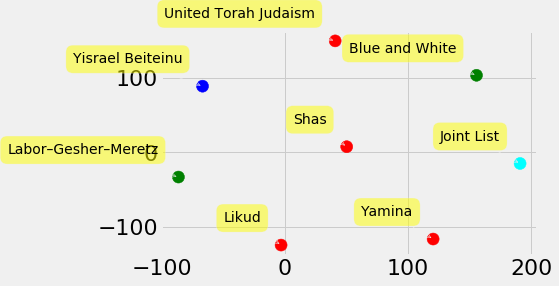

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
results_tsne = tsne.fit(X)

coords = results_tsne.embedding_

colors = ['blue','red','green','cyan','magenta','yellow','black','white']
label_colors = [colors[i] for i in clusters]

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c=label_colors
    )

#names = distance.index.values.tolist()
for label, x, y in zip(names, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()


# Distance Matrix
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance

In [22]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

x = res_work_df_percentage_votes_transpose

res = pairwise_distances(x, metric='correlation') # cosine / jaccard / correlation / euclidean

distance = pd.DataFrame(res, index=res_work_df_percentage_votes_transpose.index, 
                        columns= res_work_df_percentage_votes_transpose.index)

distance

,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas
Labor–Gesher–Meretz,0.000000,1.214565,1.248949,1.384390,1.019667,1.521667,0.299315,1.409624
United Torah Judaism,1.214565,0.000000,1.084746,0.932384,1.080579,1.023195,1.279675,0.593030
Joint List,1.248949,1.084746,0.000000,1.181839,1.155535,1.391051,1.419001,1.163201
Yamina,1.384390,0.932384,1.181839,0.000000,1.198291,0.861001,1.471950,0.984524
Yisrael Beiteinu,1.019667,1.080579,1.155535,1.198291,0.000000,0.827896,0.907799,0.999686
Likud,1.521667,1.023195,1.391051,0.861001,0.827896,0.000000,1.396065,0.499369
Blue and White,0.299315,1.279675,1.419001,1.471950,0.907799,1.396065,0.000000,1.465544
Shas,1.409624,0.593030,1.163201,0.984524,0.999686,0.499369,1.465544,0.000000


## Hierarchical Clustering

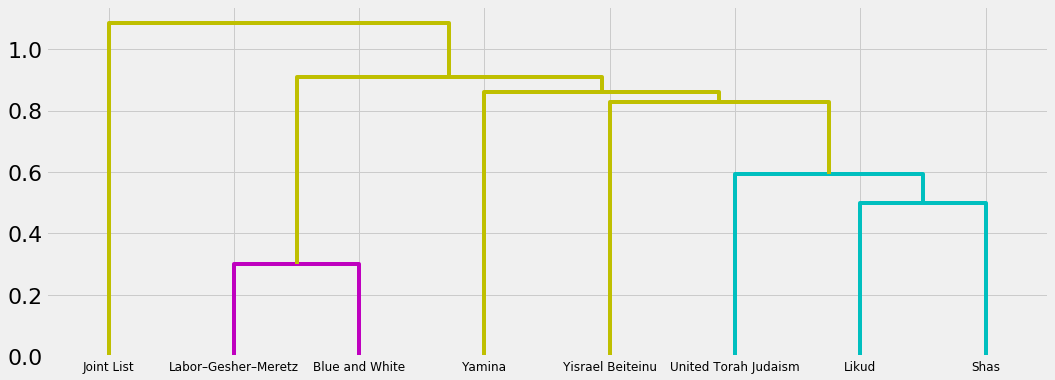

In [23]:
import scipy
from scipy.cluster import hierarchy

labels = distance.index.values.tolist()
sq_distance = scipy.spatial.distance.squareform(distance)

Z = hierarchy.linkage(sq_distance, 'single')
#plt.figure()
#dn = hierarchy.dendrogram(Z)

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top', labels=labels)
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=labels)
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right', labels=labels)
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

## Heatmap of Distance Matrix Reordered as the Dendrogram

In [24]:
new_order_distance = distance.reindex(dn1['ivl'])
new_order_distance = new_order_distance[dn1['ivl']] 

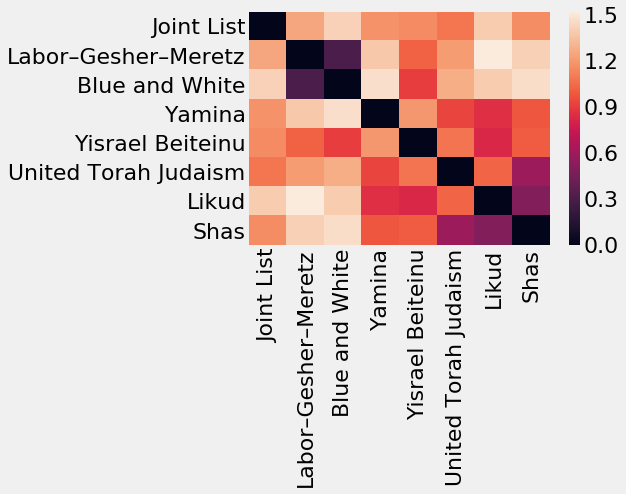

In [25]:
import seaborn as sns
ax = sns.heatmap(new_order_distance)

# Build Network

In [26]:
distance_cutoff = 1
parties = percantage_vote_per_pary.index.tolist()
parties

['Labor–Gesher–Meretz',
 'United Torah Judaism',
 'Joint List',
 'Yamina',
 'Yisrael Beiteinu',
 'Likud',
 'Blue and White',
 'Shas']

In [27]:
import itertools
dist_list = list(distance.index)
all_2_org_combos = itertools.combinations(dist_list, 2)
max_dist = distance.max().max()

# Generate graph with nodes: 
G=nx.Graph()

for p in parties:
    G.add_node(p,
               name=p,
               p_vote=float(percantage_vote_per_pary[p]),             
               comm="0") 
    
# Connect nodes:
for combo in all_2_org_combos:
    combo_dist = distance[combo[0]][combo[1]]
    opp_dist = combo_dist - max_dist
    if distance[combo[0]][combo[1]] < distance_cutoff:
        G.add_edge(combo[0],combo[1],weight=float(abs(opp_dist)))
        

n = G.number_of_nodes()
m = G.number_of_edges()     
print("number of nodes in graph G: ",n)
print("number of edges in graph G: ",m)
print()

number of nodes in graph G:  8
number of edges in graph G:  9



## Communities and Modularity
- https://en.wikipedia.org/wiki/Modularity_%28networks%29
- https://en.wikipedia.org/wiki/Community_structure
- https://en.wikipedia.org/wiki/Louvain_Modularity

In [28]:
import community
communities = community.best_partition(G)
mod = community.modularity(communities,G)
print("modularity:", mod)

modularity: 0.2817246966389093


In [29]:
if m > 0:         
    for k,v in communities.items():
        #for n in C:
        G.node[k]['comm'] = str(v)
else:
    print("Not running Community algorithm because the graph has no edges")

## Draw Networka
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
- https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

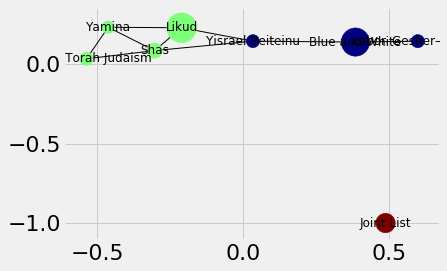

In [30]:
com_values = [communities.get(node) for node in G.nodes()]

p_votes = [d['p_vote'] for n,d in G.nodes(data=True)]
node_size=[v * 3000 for v in p_votes]

#pos=nx.spring_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G)
#pos = nx.shell_layout(G)
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=True)

## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well

In [31]:
graphFileName = "parties.gexf"
nx.write_gexf(G, graphFileName, encoding='utf-8')

# Now Generate a Similar Network For Cities 

[](http://)## Distance Matrix
- The distance will be between each city - try the correlation metric first
- The vector of each city will be composed of the relative votes for each party

In [32]:
res_work_df_percentage_votes.head(5)


,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Yamina,Yisrael Beiteinu,Likud,Blue and White,Shas
2,0.015239,0.000994,0.738446,0.002650,0.038098,0.031473,0.124565,0.040914
8,0.000000,0.000000,0.984321,0.001742,0.000000,0.000000,0.005226,0.003484
9,0.003475,0.000000,0.964379,0.000869,0.000869,0.006950,0.015639,0.000869
11,0.118644,0.009685,0.014528,0.021792,0.016949,0.259080,0.544794,0.007264
13,0.128099,0.000000,0.000000,0.064050,0.008264,0.113636,0.673554,0.012397


# ** חלק 2 - פתרון עבודת בית עבור נתוני בחירות 2020**
 # בחלק זה פתרתי את כל סעיפי עבודת הבית שניתנה כולל שאלת הבונוס של שימוש בתוכנת gephi.
 # את התמונות הנדרשות מתוכנת גפי העליתי לתוך המחברת.

## Build Distance matrix and view it

In [33]:
#1.
# Setting the data for distance matrix.
distance_data = res_work_df_percentage_votes
# Using pairwise_distances for the matrix.
res = pairwise_distances(distance_data, metric='correlation')
distance = pd.DataFrame(res, index=distance_data.index, columns = distance_data.index)
# Printing first 10 rows and columns.
distance.head(10)

,2,8,9,11,13,14,15,16,18,20,21,22,23,28,29,32,33,36,37,39,40,41,42,43,46,48,51,52,53,54,55,58,59,60,62,64,65,67,71,72,...,1151,1152,1154,1156,1157,1158,1159,1160,1161,1162,1164,1165,1166,1167,1169,1170,1171,1173,1174,1176,1177,1178,1181,1183,1187,1189,1191,1192,1193,1199,1202,1203,1204,1205,1206,1207,1208,1209,1210,1213
2,0.000000,0.011462,0.010154,1.099844,1.084019,1.064037,1.195705,1.207661,1.111203,1.196561,1.315821,1.285003,1.310564,1.242820,1.077698,0.011895,0.012528,1.078298,1.366018,1.079731,1.228415,1.237840,1.222729,1.082732,1.185185,1.220411,1.185098,1.220260,1.164838,1.205354,1.268098,1.081036,1.089759,1.137744,1.162768,1.117750,1.293833,0.011595,1.077439,1.250426,...,1.079753,1.216863,1.251710,1.098380,1.298844,1.125482,1.082104,1.357780,1.110481,0.011399,1.267506,1.181526,1.090923,1.109709,1.262011,1.071506,1.257582,0.008631,1.229597,1.074038,1.124860,1.095459,1.201498,1.219351,1.062467,1.069654,1.071071,1.124622,1.104141,1.103660,1.136650,1.161051,1.255568,1.064985,1.190160,1.271270,1.245827,1.293989,1.299379,1.264138
8,0.011462,0.000000,0.000081,1.228408,1.218057,1.201018,1.203370,1.286115,1.243553,1.235063,1.275384,1.249296,1.262608,1.258510,1.214542,0.000023,0.000191,1.214344,1.364517,1.208270,1.266657,1.267089,1.297681,1.218600,1.295284,1.311848,1.286679,1.220831,1.278696,1.208286,1.262079,1.200748,1.220414,1.248056,1.272522,1.244373,1.230011,0.000030,1.204753,1.193136,...,1.209211,1.213681,1.294830,1.214342,1.269384,1.245044,1.215914,1.422153,1.233888,0.000006,1.209404,1.283586,1.212395,1.209177,1.296915,1.195131,1.303696,0.005499,1.290069,1.211660,1.241648,1.216346,1.255206,1.256097,1.200879,1.201144,1.206588,1.254259,1.234978,1.235187,1.255434,1.283053,1.253369,1.198153,1.279977,1.319074,1.193459,1.289958,1.260529,1.277347
9,0.010154,0.000081,0.000000,1.216614,1.207652,1.190083,1.197839,1.275922,1.232050,1.227113,1.275213,1.249475,1.263702,1.252972,1.203634,0.000084,0.000211,1.203450,1.363136,1.197974,1.260670,1.261096,1.288328,1.207842,1.284303,1.302183,1.275505,1.216599,1.267905,1.204770,1.264157,1.191029,1.209950,1.237284,1.261025,1.232631,1.233798,0.000058,1.194627,1.196609,...,1.199087,1.210200,1.288377,1.204443,1.267901,1.234322,1.205249,1.413680,1.223474,0.000061,1.212908,1.272562,1.202344,1.200382,1.289853,1.185141,1.295908,0.005132,1.280941,1.200855,1.230215,1.206384,1.246722,1.248302,1.189973,1.189421,1.195980,1.242899,1.223400,1.223702,1.244057,1.271422,1.250516,1.187613,1.269580,1.311205,1.197298,1.286666,1.260154,1.272100
11,1.099844,1.228408,1.216614,0.000000,0.050547,0.027951,0.643054,0.202043,0.002618,0.437244,0.955189,0.947356,1.031782,0.589852,0.032028,1.228740,1.227849,0.031669,0.852266,0.088356,0.524444,0.579395,0.247537,0.036728,0.062458,0.193895,0.104155,0.714184,0.078130,0.757213,1.029513,0.141021,0.072542,0.103442,0.054863,0.006717,1.200137,1.226194,0.097305,1.179899,...,0.094796,0.768231,0.514804,0.139222,0.855082,0.085519,0.047712,0.298917,0.092697,1.227046,1.176535,0.098032,0.116154,0.247232,0.438494,0.118950,0.373017,1.198954,0.293155,0.039978,0.054034,0.124832,0.356852,0.435745,0.030102,0.005420,0.049013,0.009334,0.003709,0.005996,0.035840,0.013547,0.775832,0.061257,0.154731,0.381314,1.259660,0.691605,0.938134,0.592795
13,1.084019,1.218057,1.207652,0.050547,0.000000,0.005858,0.938332,0.412158,0.039744,0.712510,1.123777,0.999203,1.148602,0.860009,0.006146,1.219703,1.219675,0.006086,1.105719,0.025653,0.790169,0.863736,0.471222,0.003098,0.165973,0.393111,0.275846,1.000169,0.219716,1.043052,1.193678,0.061346,0.016824,0.095239,0.189547,0.081744,1.172136,1.217806,0.026636,1.134462,...,0.022340,1.055289,0.784876,0.074389,0.986969,0.058716,0.004076,0.424371,0.042916,1.217379,1.127444,0.267612,0.050174,0.167080,0.654031,0.045774,0.594727,1.185172,0.511218,0.006114,0.074538,0.055226,0.610154,0.705033,0.007796,0.044045,0.003097,0.062863,0.040663,0.022769,0.146834,0.087584,1.047725,0.008816,0.348549,0.627438,1.256673,0.817694,1.039206,0.842957
14,1.064037,1.201018,1.190083,0.027951,0.00585

## Build Network

### Build the network of cities with the following attributes
- distance_cutoff = 0.01
- min_proper_votes = 1000 : use only cities where proper_votes > min_proper_votes
- Data for each node: city code, city name, proper votes, community
- Edge weight: similarity 

In [34]:
distance_cutoff = 0.01
min_proper_votes = 1000

### Create dictionaries if neccassary

In [35]:
#2.
# Dictionaries.

# Cities list.
cities_list = res_work_df.index.tolist()
# Creating the first dictionary. index --> city name.
dict_idx2set_name = {i:res_work_df.loc[i]['Settlement_name'] for i in cities_list}
print(dict_idx2set_name[23])
# Creating the second dictionary. city name --> amount of proper votes in chosen city.
dict_set_name2proper_votes= {res_work_df.loc[i]['Settlement_name']:res_work_df.loc[i]['proper_votes'] for i in cities_list}
print(dict_set_name2proper_votes['אבן יהודה'])

אבני חפץ
7542


### Create list of cities that hold all the constraints
- How many cities hold the constrains?

In [36]:
#3.
# Cities with proper votes above 1000.
cities_index_above_min_list = [index for index in res_work_df.index if res_work_df.get_value(index,'proper_votes') > min_proper_votes]
print ("How many cities hold the constrains? -","Answer: ",len(cities_index_above_min_list))


How many cities hold the constrains? - Answer:  222


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Network Generation
- How many nodes?
- How many edges?

In [37]:
#4
G = nx.Graph()
 # Every node contains all relevant information: city_index, city_name, proper_votes.
 # Adding city nodes to the graph.
for index in cities_index_above_min_list:
    G.add_node(int(index), city_index =int(index),city_name= dict_idx2set_name[index],city_proper_votes = int(dict_set_name2proper_votes[dict_idx2set_name[index]]))

# Searching for connecting nodes that satisfies the distance's condition.   
for node_source,data_source in G.nodes (data=True):
    source_index = data_source['city_index']
    for node_candidate_neighbour,data_candidate_neighbour in G.nodes (data=True):
        candidate_neighbour_index = data_candidate_neighbour['city_index']
        # Satisfies distance condition and different nodes.
        if node_source != node_candidate_neighbour and distance[source_index][candidate_neighbour_index] < distance_cutoff:
             G.add_edge(node_source,node_candidate_neighbour)
   
        
n = G.number_of_nodes()
m = G.number_of_edges()

print("How many nodes? -> Nodes amount : ", n)
print("How many edges? -> Edges amount : ",m)

How many nodes? -> Nodes amount :  222
How many edges? -> Edges amount :  1996


### Run community algorithm
- How many communities?
- How many nodes in the largest community?
- What is the modularity score?

In [38]:
#5.
import community
from collections import Counter
# Fetching Graph G's communities - by best partitioning.
communities = community.best_partition(G)

# Calculating the modularity of the communities in a graph G.
modularity = community.modularity(communities,G)
# Values of communities.
community_values = set(communities.values())

print("How many communities? - Number of communities: ", len(community_values))
print("What is the modularity score? - Modularity score: ", modularity)

# Communities division values.
communities_size = communities.values()
# For each community - displaying number of elements (nodes) in it.
communities_size = Counter (communities_size).most_common(1)
# Maximun community size.
max_community_size = communities_size[0][1]
print ("How many nodes in the largest community? - Number of nodes in the largest community: ",max_community_size)

How many communities? - Number of communities:  50
What is the modularity score? - Modularity score:  0.41024270484857495
How many nodes in the largest community? - Number of nodes in the largest community:  58


### Add communitites information to the nodes in the network

In [39]:
#6.
# Adding information for each community in graph G, the connected community.
# communities contatining the information from best_partition.
for community in communities:
    G.node[community]['comm'] = communities[community]
    print(G.node[community])

{'city_index': 2, 'city_name': 'אבו סנאן', 'city_proper_votes': 6037, 'comm': 0}
{'city_index': 9, 'city_name': 'אבטין', 'city_proper_votes': 1151, 'comm': 0}
{'city_index': 18, 'city_name': 'אבן יהודה', 'city_proper_votes': 7542, 'comm': 1}
{'city_index': 32, 'city_name': 'אום אלפחם', 'city_proper_votes': 22409, 'comm': 0}
{'city_index': 37, 'city_name': 'אופקים', 'city_proper_votes': 14546, 'comm': 2}
{'city_index': 40, 'city_name': 'אור יהודה', 'city_proper_votes': 18734, 'comm': 3}
{'city_index': 41, 'city_name': 'אור עקיבא', 'city_proper_votes': 10237, 'comm': 3}
{'city_index': 46, 'city_name': 'אורנית', 'city_proper_votes': 4927, 'comm': 1}
{'city_index': 48, 'city_name': 'אזור', 'city_proper_votes': 6689, 'comm': 4}
{'city_index': 51, 'city_name': 'אחוזת ברק', 'city_proper_votes': 1302, 'comm': 4}
{'city_index': 55, 'city_name': 'אחיעזר', 'city_proper_votes': 1022, 'comm': 5}
{'city_index': 67, 'city_name': 'אכסאל', 'city_proper_votes': 6512, 'comm': 0}
{'city_index': 73, 'city_

## Draw Network
- Set node size according to votes / degree
- Try different layouts

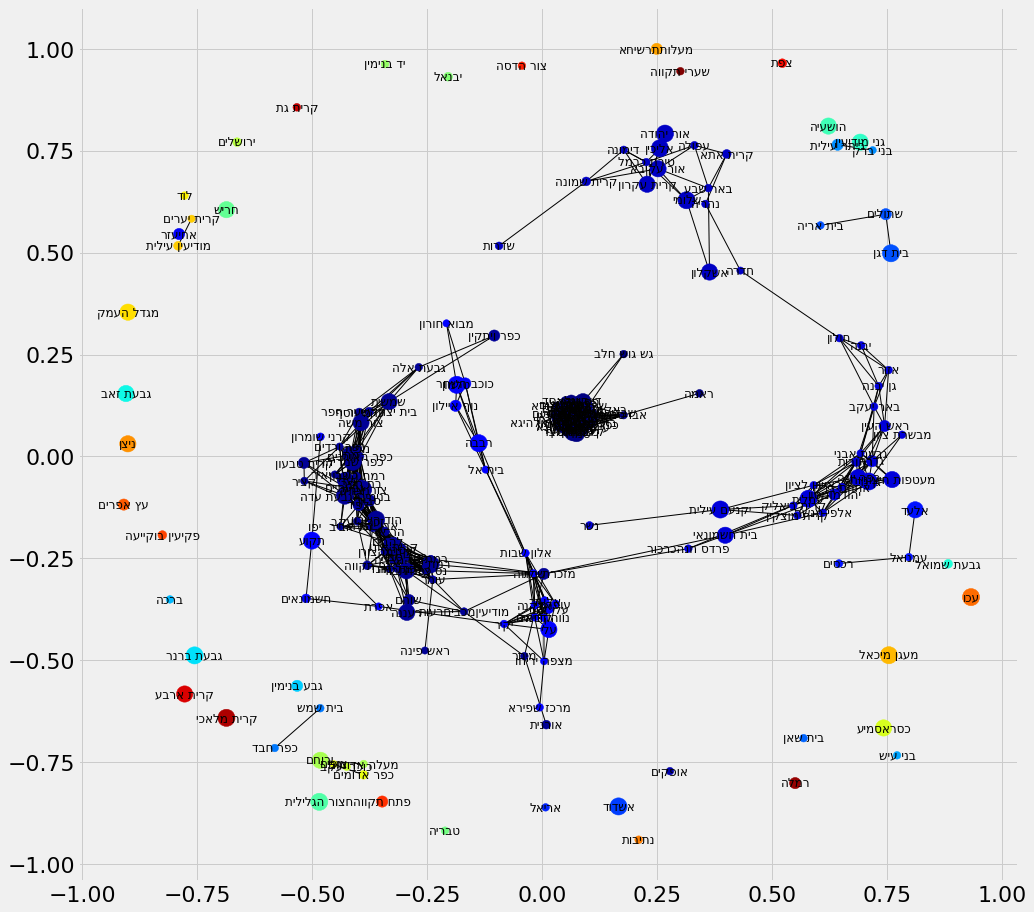

In [40]:
#7.
#node_size=[v * 0.01 for v in p_votes]
# I changed node_size in order to optimize the visibility of the newtork on the screen.
node_size=[v * 1000 for v in p_votes]
# Convert communities to list.
community_values_for_network = [communities.get(node) for node in G.nodes()]
# Fixing cities names in hebrew on network.
# Network grpah reversing the order of cities names because it in hebrew.
old_labels = nx.get_node_attributes(G,'city_name')

# Dictionary: city name in original G--> fixing city name for network.
label_to_reverse_label_dictionary = {key : value[::-1] for key,value in dict_idx2set_name.items() } 

copy_G = G.copy()
# Setting the hebrew labels fixed on new network.
copy_G = nx.relabel_nodes(copy_G,label_to_reverse_label_dictionary,copy=True)
# Plot size on screen.
plt.figure(figsize=(15,15))
pos=nx.spring_layout(copy_G,k=0.15)
nx.draw_networkx(copy_G,pos, cmap = plt.get_cmap('jet'), node_color = community_values_for_network, node_size=node_size, with_labels=True)

## Calculate:

### Sum over network
- Using the network, sum proper votes for each community 
- Print the top 5 communities (in sum of votes) and the cities that compose them
- For one of the cities in a top-5 community, print the votes for each party 

In [41]:
#8.
community_votes={}
# Fetching for each community the amount of proper votes for all connected cities.
for key,value in communities.items():
    if value not in community_votes:
        community_votes[value]=G.node[key]['city_proper_votes'] 
    else:
        community_votes[value]+=G.node[key]['city_proper_votes']
# Top 5 proper votes index.
community_votes = sorted(community_votes, key=community_votes.get, reverse=True)[:5]
print("Top communities indexes: " , community_votes)
print ("Communities and cities that belong to the community:")
for i in range(5):
    print("Community no. ", i+1)
    for city in communities:
        if communities[city] == community_votes[i]:
            print("City name: " , dict_idx2set_name[city], "Number of votes: ",dict_set_name2proper_votes[dict_idx2set_name[city]])
            chosen_city_name = dict_idx2set_name[city]

# Printing votes for parties in chosen city.     
print("The amount of votes per party in the city of " ,chosen_city_name)
print(res_work_df_city.loc[res_work_df_city['Settlement_name']==chosen_city_name].iloc[:,9:])


Top communities indexes:  [4, 1, 3, 0, 28]
Communities and cities that belong to the community:
Community no.  1
City name:  אזור Number of votes:  6689
City name:  אחוזת ברק Number of votes:  1302
City name:  אלפי מנשה Number of votes:  4277
City name:  באר יעקב Number of votes:  12635
City name:  בית חשמונאי Number of votes:  1122
City name:  גבעת אבני Number of votes:  1152
City name:  גדרה Number of votes:  13059
City name:  גן יבנה Number of votes:  12330
City name:  גן נר Number of votes:  1489
City name:  חולון Number of votes:  101066
City name:  יבנה Number of votes:  25019
City name:  יהודמונוסון Number of votes:  16825
City name:  יקנעם עילית Number of votes:  12475
City name:  כפר יונה Number of votes:  12084
City name:  מבשרת ציון Number of votes:  13559
City name:  מעטפות חיצוניות Number of votes:  327702
City name:  נשר Number of votes:  12579
City name:  עתלית Number of votes:  4246
City name:  פרדס חנהכרכור Number of votes:  21758
City name:  קרית ביאליק Number of vote

## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well
  - Take a screen-shot of the entire network
  - Take a screen-shot of the largest community (sum over proper votes)

In [42]:
# Reversing the order of city names which contain more than 1 word in the name. 
def reverseOrderOfCityName(city_name):
    #Split the string into words. 
    words = city_name.split(' ')  
    # Reversing the split string list and join using space. 
    reverse_sentence = ' '.join(reversed(words))  
    # Return the joined string.
    return reverse_sentence 

G_reverse_hebrew_labels = G.copy()
# Dictionary for changing hebrew words order: city name in original G--> fixing city name for network.
label_to_reverse_word_position_label_dictionary = {key : reverseOrderOfCityName(value) for key,value in dict_idx2set_name.items() } 


#Setting the hebrew labels fixed on new network.
G_reverse_hebrew_labels = nx.relabel_nodes(G_reverse_hebrew_labels,label_to_reverse_word_position_label_dictionary,copy=True)

nx.gexf.write_gexf(G_reverse_hebrew_labels,'network_reverse_hebrew_labels_gephi.gexf',encoding='utf-8')

# Displaying the images from gephi.

# Displaying the network screenshot.

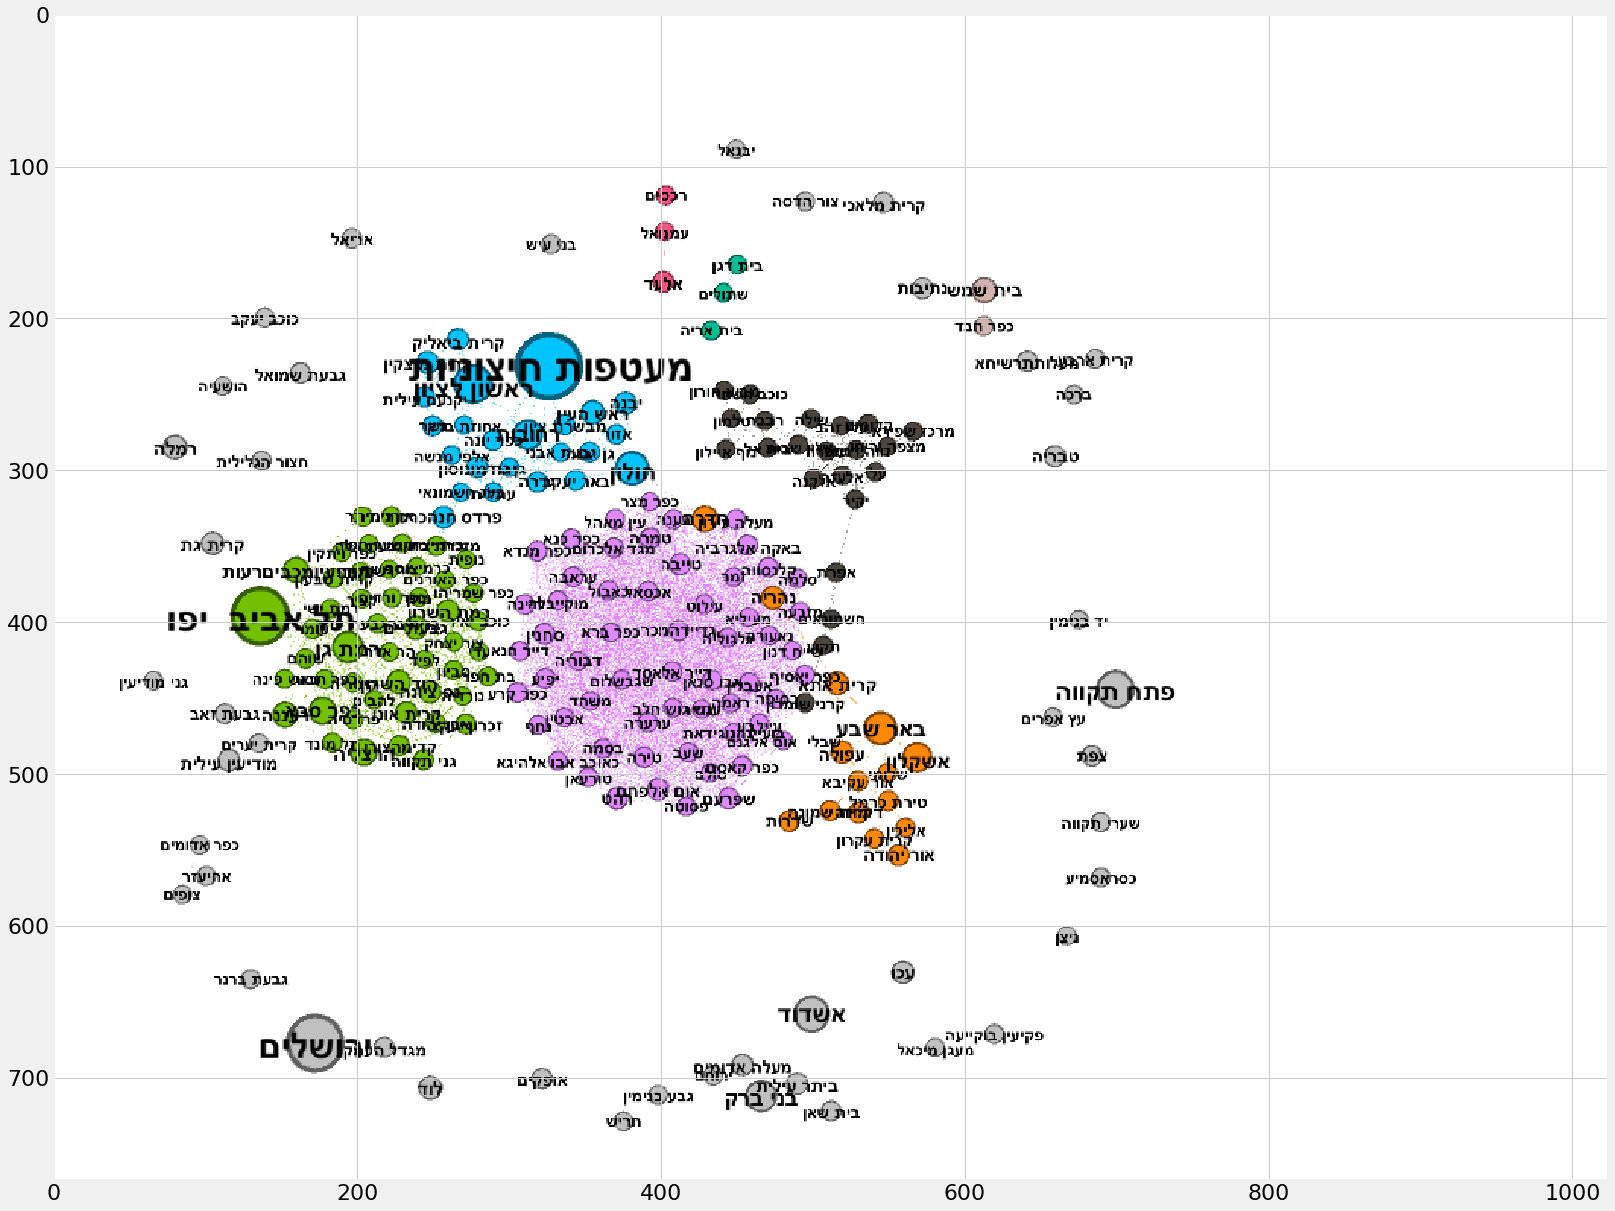

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img_array = np.array(Image.open('../input/screenshot-network/screenshot_network.png'))
plt.figure(figsize = (40,20))
plt.imshow(img_array)

# Displaying the biggest community screenshot.

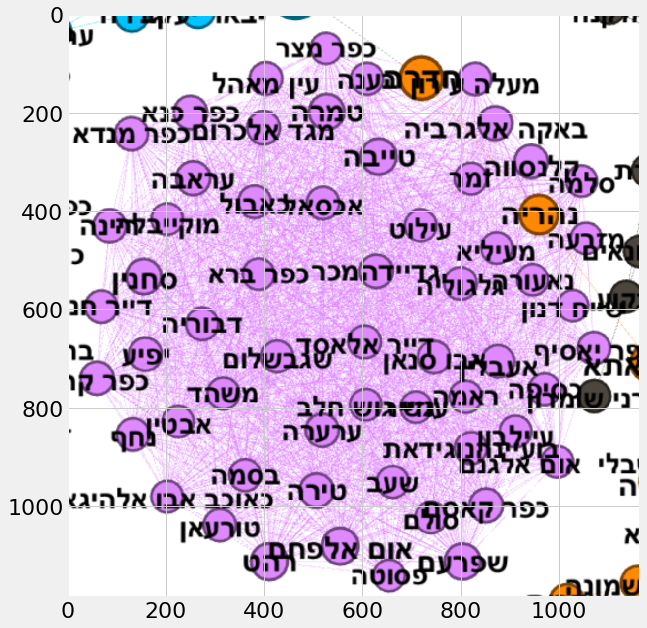

In [44]:

img_array = np.array(Image.open('../input/largest-community/largest_community.png'))
plt.figure(figsize = (30,10))
plt.imshow(img_array)

## Questions on Network: 
- Why large Cities are a singelton community?
- Which cities are in the community of Beer Sheva?

In [45]:
city = 'באר שבע'
# Fetching the community of the city.
for key in G.node:
        if G.node[key]['city_name'] == city:
            community_of_city = G.node[key]['comm']
            
# Retrieve the cities that are in the same community with the city.          
cities_in_communities = []
for key in G.node:
    if G.node[key]['comm'] == community_of_city and G.node[key]['city_name'] != city:
        cities_in_communities.append(G.node[key]['city_name'])
print ("Which cities are in the community of Beer Sheva?") 
print ("Answer: ", cities_in_communities)

print("\n\nWhy large Cities are a singelton community?")
print("Answer: Large cities often have their own character unlike other small cities, so they have a different voting distribution than other cities in the country.")
print("Large cities have a high amount of votes, and their residents have certain things that reflect the nature of the city, so the needs of large city residents often don't match the needs of small-town residents.")
print("Therefore, the combination of high amount of votes and different preferences in large cities creates a situation that is more difficult to find small cities that will be similar in voting.")
print("Thus creating a situation that large cities may be in a single community.")

Which cities are in the community of Beer Sheva?
Answer:  ['אור יהודה', 'אור עקיבא', 'אליכין', 'אשקלון', 'דימונה', 'חדרה', 'טירת כרמל', 'נהריה', 'עפולה', 'קרית אתא', 'קרית עקרון', 'קרית שמונה', 'שדרות', 'שלומי']


Why large Cities are a singelton community?
Answer: Large cities often have their own character unlike other small cities, so they have a different voting distribution than other cities in the country.
Large cities have a high amount of votes, and their residents have certain things that reflect the nature of the city, so the needs of large city residents often don't match the needs of small-town residents.
Therefore, the combination of high amount of votes and different preferences in large cities creates a situation that is more difficult to find small cities that will be similar in voting.
Thus creating a situation that large cities may be in a single community.


# Intersting  links:
- https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb

#  ** הסבר כללי על החלק היצירתי והחדשני:**
בחלק זה החלטתי לבצע בדיקות על נתוני הבחירות כאשר אני מחלק את קולות המצביעים לפי מחוזות. כל ישוב שייך למחוז אחד, וכך חילקתי את הקולות של כל ישוב למחוז המתאים לו. לצורך כך נעזרתי בבסיס נתונים של הלשכה המרכזית לסטטיסטיקה.
בבסיס הנתונים בו נעזרתי הופיע עבור כל ישוב מספר המחוז שהוא שייך אליו, ולאחר מכן ביצעתי מיפוי בין מספר המחוז לשם המחוז.  

חילקתי את החלק היצירתי והחדשני ל-4 חלקים ועבור כל חלק יצרתי גרפים מתאימים:
1. הצגת אחוזי הצבעה בכל מחוז
2. הצגת אחוזי הקולות המזויפים בכל מחוז
3. הצגת התפלגות הקולות לכל מפלגה בכל אחד מהמחוזות.
4. בחינת תוצאות הבחירות - אם שיטת חלוקת המנדטים הייתה שונה.


# במשבצת הבאה אכין את הנתונים. אבצע טעינה ועיבוד מקדים בכדי שיהיו לי רק את הנתונים הרלוונטים. מטרת המשבצת היא שעבור כל שורה בבסיס הנתונים של תוצאות הבחירות, תתווסף גם עמודה שתציין את המחוז שאליו שייך הישוב שמופיע בה.

In [46]:
# Fetching district and settlement names database, keeping only relevant column.
# Preproccessing on dataset:
# I have changed relevant column names to english, and removed symbols as: ()- from settelement names so it will fit the original election data.
df_settle_mahoz = pd.read_csv('../input/settle-district/settle_district_2018.csv', encoding='utf-8',usecols = ['settlement_name','settlement_code','district'])

# Mapping between district number (as it shows in dataset) --> district name.
# The mapping was done by checking on the internet for several representative cities from each district number, in order to find out the district name and thus match the district number to the district name. 
district_number_to_name_dict = {1:"Jerusalem",2:"North",3:"Haifa",4:"Center",5:"Tel Aviv",6:"South",7:"Judea and Samaria Area"}

# For each district number adding district name column to df_settle_mahoz.
df_settle_mahoz['district_name']=df_settle_mahoz.apply(lambda x:district_number_to_name_dict[x['district']],axis=1)

# Adding district name to df_copy_for_district_part.
df_copy_for_district_part = df_copy_for_district_part.merge(df_settle_mahoz[['settlement_name','district_name']],left_on='Settlement_name', right_on ='settlement_name')
# Remove duplicate column.
df_copy_for_district_part = df_copy_for_district_part.drop(['settlement_name'],axis=1)
print (df_copy_for_district_part.head(5))

   Committee symbol  Barzel      ...       Shas  district_name
0                18    9870      ...          2          South
1                18    9871      ...          0          South
2                18    9872      ...          0          South
3                 2     736      ...          2      Jerusalem
4                 2     737      ...          0      Jerusalem

[5 rows x 42 columns]


# חלק 1 - הצגת אחוזי הצבעה בכל מחוז  
חישוב אחוזי הצבעה בכל מחוז: חישוב כמות הצבעות בכל מחוז ביחס לכמות בעלי זכות הצבעה במחוז.


In [47]:
# Calculating votes percentage per district. 
def caculate_votes_percentage_in_district():
    total_district_votes =   df_copy_for_district_part[['district_name','Registered_voters','votes']].groupby('district_name').sum()
    total_district_votes['votes_percentage']=total_district_votes.apply(lambda x:x['votes']/x['Registered_voters'],axis=1)
    return total_district_votes
    
    
district_votes_percentage = caculate_votes_percentage_in_district()  
# Printing district name, votes percentage.
print (district_votes_percentage['votes_percentage'])

district_name
Center                    0.699008
Haifa                     0.626735
Jerusalem                 0.646124
Judea and Samaria Area    0.768591
North                     0.667099
South                     0.634594
Tel Aviv                  0.656521
Name: votes_percentage, dtype: float64


# הצגה ויזואלית של אחוזי ההצבעה בכל מחוז.

In [48]:
!pip install plotly==4.7.0
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot

    100% |████████████████████████████████| 11.5MB 3.3MB/s 
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement keras-applications>=1.0.5, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.10.0 has requirement keras-preprocessing>=1.0.3, but you'll have keras-preprocessing 1.0.2 which is incompatible.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.1 which is incompatible.
kmodes 0.9 has requirement scikit-learn<0.20.0,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.4.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.1 which is incompatible.
kmeans-smote 0.1.0 has requirement scikit-learn<0.20,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
anaconda-client 1.7.2 has requi

In [49]:


#print(plotly.__version__)

# Displaying bubble chart:
# X-Axis: district names.
# Y-Axis: votes percentage in district.
# Size: Registered voters in district.
fig = go.Figure(data=[go.Scatter(
   x=district_votes_percentage.index.values.tolist(),
   y= district_votes_percentage['votes_percentage'].tolist(),
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=(district_votes_percentage['Registered_voters']/max(district_votes_percentage['Registered_voters'])*100).tolist(),
        showscale=True
        )
)])

fig.show()

# חלק 2 - הצגת אחוזי קולות מזויפים (פסולים) בכל מחוז
חישוב אחוז הצבעות פסולות בכל מחוז: 
עבור כל מחוז - חישוב כמה מבין ההצבעות במחוז נפסלו.
החישוב נעשה על ידי חישוב היחס בין כמות ההצבעות המזויפות לבין כמות ההצבעות.

In [50]:
# Calculating fake votes percentage per district.
def caculate_bad_votes_percentage_in_district():
    bad_district_votes = df_copy_for_district_part[['district_name','votes','bad_votes']].groupby('district_name').sum()
    bad_district_votes['bad_votes_percentage']=bad_district_votes.apply(lambda x:x['bad_votes']/x['votes'],axis=1)
    return bad_district_votes

district_bad_votes_percentage = caculate_bad_votes_percentage_in_district()
# Printing district name, fake votes percentage.
print (district_bad_votes_percentage['bad_votes_percentage'])

district_name
Center                    0.004519
Haifa                     0.005389
Jerusalem                 0.005938
Judea and Samaria Area    0.005227
North                     0.005179
South                     0.006166
Tel Aviv                  0.006128
Name: bad_votes_percentage, dtype: float64


# הצגה ויזואלית של אחוזי הקולות המזויפים בכל מחוז.

In [51]:
# Displaying bubble chart:
# X-Axis: district names.
# Y-Axis: bad votes percentage in district.
# Size: votes in district.
fig = go.Figure(data=[go.Scatter(
   x=district_bad_votes_percentage.index.values.tolist(),
   y= district_bad_votes_percentage['bad_votes_percentage'].tolist(),
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=(district_bad_votes_percentage['votes']/max(district_bad_votes_percentage['votes'])*100).tolist(),
        showscale=True
        )
)])

fig.show()
    

# חלק 3 - הצגת התפלגות הקולות לכל מפלגה בכל אחד מהמחוזות.
במשבצת הבאה אחשב את כמות ההצבעות לכל מפלגה בכל אחד מהמחוזות.

In [52]:
list(parties_dic.values())

# Calculating parties votes per district.
def caculate_votes_for_party_in_district():
    votes_for_party_in_district = df_copy_for_district_part[['district_name']+list(parties_dic.values())].groupby('district_name').sum()
    return votes_for_party_in_district

votes_for_party_in_district = caculate_votes_for_party_in_district()
votes_for_party_in_district

,Labor–Gesher–Meretz,United Torah Judaism,Joint List,Otzma Liberalit Kalkalit,Peula LeYisrael,Tzomet,Yamina,HaHazon,Uncorrupted Red White,HaBrit HaMeshutefet,Kavod HaAdam,Bible Bloc Party,Social Leadership,HaLev HaYehudi,Ani VeAta,Yisrael Beiteinu,Likud,Kol HaNashim,Koah Lehashpi'a,Kama – Advancing the Status of the Individual,Otzma Yehudit,Mitkademet,Blue and White,Pirate Party,Da'am: Green Economy – One State,Zekhuyoteinu BeKoleinu,Shema,Seder Hadash,Mishpat Tzedek,Shas
district_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Center,58675,27854,77842,857,36,0,58224,52,68,82,51,61,46,87,159,59166,344092,637,146,72,3984,96,353537,227,113,167,81,131,216,73570
Haifa,23167,10021,92774,285,20,0,11368,28,30,92,23,44,24,42,87,26385,96631,220,64,26,944,88,110608,98,80,117,52,54,184,17010
Jerusalem,18229,79571,9036,228,11,0,26784,11,18,19,9,45,17,66,34,8527,99045,227,48,25,2328,21,47921,97,26,31,24,39,100,55311
Judea and Samaria Area,2391,39457,116,148,6,0,40338,6,7,0,2,22,6,36,10,5034,53291,120,16,2,2605,6,16643,60,5,7,5,13,72,19987
North,31480,9250,283256,264,27,0,15397,29,53,317,54,52,42,66,154,31191,114809,314,95,55,1517,183,104973,127,111,191,84,132,249,25982
South,21871,26014,63912,335,45,0,23745,72,43,77,30,60,49,58,113,54137,201773,292,77,53,2333,101,95963,150,100,157,84,119,208,54259
Tel Aviv,24750,55863,1467,343,15,0,11788,43,21,14,9,25,18,32,70,24636,126030,250,60,26,1526,20,128937,106,47,68,22,63,87,49558


# במשבצת הבאה אציג גרף מיועד עבור כל מחוז, סך הכול 7 גרפים, המציג את התפלגות הקולות של כלל המפלגות באותו המחוז.

In [53]:
import plotly.express as px

# Displaying pie chart of votes distribution for each party in chosen district.
def showPieChartVotesForDistrict(district):
    fig = px.pie(votes_for_party_in_district.T,names=list(parties_dic.values()), values=district, title="Pie chart - "+district,width=800, height=400)
    fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=40, pad=100),
    paper_bgcolor="rgba(143, 178, 247,1)")
    fig.show()
    
# District names: Center,Haifa,Jerusalem,Judea and Samaria Area,North,South,Tel Aviv.    
# Displaying pie chart for every district.   
for district_name in votes_for_party_in_district.index:
    showPieChartVotesForDistrict(district_name)

# חלק 4 - תוצאות בחירות במתכונת שונה

# בחינת תוצאות הבחירות - אם שיטת חלוקת המנדטים הייתה שונה.
בחלק זה רציתי לבחון איך היו נראות תוצאות הבחירות, אם שיטת חלוקת המנדטים הייתה שונה.
החלטתי לחלק את המנדטים לפי אחוזי ההצבעה בכל אחד ממחוזות המדינה.
ישנם 7 מחוזות, וכל ישוב שייך למחוז אחד בלבד.
בדומה לארצות הברית, שם למדינות מסוימות יש השפעה גדולה יותר מבחינת כמות האלקטורים, כך ניסיתי לתת לכל מחוז כמות מנדטים שונה. אולם, בשונה מארצות הברית, שם החלוקה ידועה מראש, פה רציתי לעודד אחוזי הצבעה ולכן החלוקה לא נקבעת מראש אלא רק בתום ההצבעה.
מכיוון שאזרחים רבים בעלי זכות הצבעה אינם מצביעים, החלטתי להעניק את כמות המנדטים לכל מחוז ביחס ישיר לאחוז ההצבעה במחוז.
המחוז בעל אחוז ההצבעה הגבוה ביותר יקבל את המספר הגדול ביותר של מנדטים, והמחוז בעל אחוז ההצבעה הנמוך ביותר יקבל את המספר הקטן ביותר של מנדטים.
בדומה לאחוז החסימה הארצי שקיים, החלטתי לקחת את חמשת המפלגות בעלות מספר ההצבעות הרב ביותר בכל מחוז, ולחלק רק להן את המנדטים של המחוז.
חלוקת המנדטים לכל מפלגה במחוז מתבצעת ביחס ישיר לאחוז המצביעים למפלגה במחוז - פירוט יינתן בהמשך.
המטרה של חלק זה הייתה לבחון את תוצאות הבחירות אם חלוקת המנדטים הייתה שונה, תוך עידוד הצבעה בקרב האזרחים.

# במשבצת הבאה נחשב עבור כל מחוז את כמות המנדטים ששייכת לו.
הסבר על החישוב:
לאחר שחישבנו את אחוזי ההצבעה בכל מחוז (בחלק 1), נמיין אותם.
מכיוון שיש 120 חברי כנסת, נרצה לחלק 120 מנדטים ל-7 מחוזות.
החלוקה מתבצעת כך:
כל מחוז מקבל מנדט אחד באופן אוטומטי.
בנוסף, המחוז בעל אחוזי ההצבעה הכי גבוהים מקבל מנדט נוסף.
שאר 112 המנדטים שנותרו מתחלקים בין המחוזות כך:
מכיוון שהמטרה היא לעודד אחוזי הצבעה במחוזות אז שאר המנדטים ניתנים באופן ישיר ביחס לאחוזי ההצבעה במחוז.

# כלומר, חלוקת המנדטים תיראה באופן הבא:
מחוז שנמצא במקום ה-1 באחוזי ההצבעה: 28 מנדטים + 1 מנדט אוטומטי + 1 מנדט על אחוזי הצבעה גבוהים היותר = 30 מנדטים.
מחוז שנמצא במקום ה-2 באחוזי הצבעה: 24 מנדטים + 1 מנדט אוטומטי = 25 מנדטים.
מחוז שנמצא במקום ה-3 באחוזי הצבעה: 20 מנדטים + 1 מנדט אוטומטי = 21 מנדטים.
מחוז שנמצא במקום ה-4 באחוזי הצבעה: 16 מנדטים + 1 מנדט אוטומטי = 17 מנדטים.
מחוז שנמצא במקום ה-5 באחוזי הצבעה: 12 מנדטים + 1 מנדט אוטומטי = 13 מנדטים.
מחוז שנמצא במקום ה-6 באחוזי הצבעה: 8 מנדטים + 1 מנדט אוטומטי = 9 מנדטים.
מחוז שנמצא במקום ה-7 באחוזי הצבעה: 4 מנדטים + 1 מנדט אוטומטי = 5 מנדטים.
סך הכול נקבל 120 מנדטים שמתחלקים בין המחוזות.

In [54]:
# Sorting districts by votes percentage.
district_votes_percentage_sorted = district_votes_percentage.sort_values(by=['votes_percentage'], axis=0)

counter = 0
# Adding relative amount of mandates for each district.
# Adding 1 mandate for each district, Adding 1 extra to the district in the first place.
def addMandateToDistrict():
    global counter
    counter = counter +1
    if counter == 7:
        return 4*counter+1+1
    else:
        return 4*counter+1
# Creating another column to district_votes_percentage_sorted which contains the mandate amount for each district.    
district_votes_percentage_sorted['mandate_amount']=district_votes_percentage_sorted.apply(lambda x: addMandateToDistrict() , axis=1)
district_votes_percentage_sorted

,Registered_voters,votes,votes_percentage,mandate_amount
district_name,,,,
Haifa,626552,392682,0.626735,5
South,866096,549619,0.634594,9
Jerusalem,541577,349926,0.646124,13
Tel Aviv,652713,428520,0.656521,17
North,934920,623684,0.667099,21
Center,1523791,1065142,0.699008,25
Judea and Samaria Area,235963,181359,0.768591,30


# הצגה ויזואלית של כמות המנדטים לכל מחוז

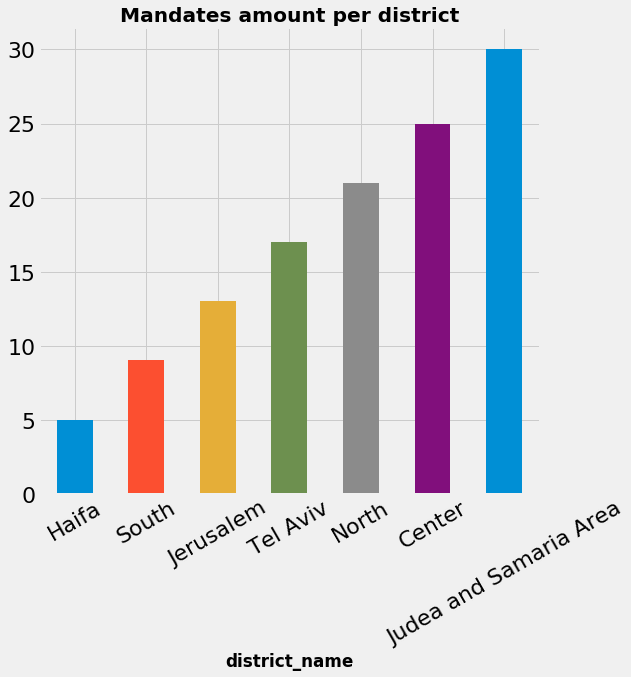

In [55]:
district_votes_percentage_sorted.plot.bar(y='mandate_amount', rot=30,title='Mandates amount per district',figsize = [8,8],legend = False)

# במשבצת הבאה נשלוף מכל מחוז את חמשת המפלגות הגדולות ביותר בו, וכמות ההצבעות לכל אחת מהן באותו המחוז.

In [56]:
# Fetching the n largest parties for every district. District name: {Party:Amount of votes}
# Setting n largest parties size as 5.
n_largest = 5
top_n_parties_in_district = votes_for_party_in_district.apply(lambda x: dict(zip(x.nlargest(n_largest).index.values,x.nlargest(n_largest).values)), axis=1)

# Printing district name: Amount of votes for each of the top n parties in the district.
top_n_parties_in_district

district_name
Center                    {'Blue and White': 353537, 'Likud': 344092, 'J...
Haifa                     {'Blue and White': 110608, 'Likud': 96631, 'Jo...
Jerusalem                 {'Likud': 99045, 'United Torah Judaism': 79571...
Judea and Samaria Area    {'Likud': 53291, 'Yamina': 40338, 'United Tora...
North                     {'Joint List': 283256, 'Likud': 114809, 'Blue ...
South                     {'Likud': 201773, 'Blue and White': 95963, 'Jo...
Tel Aviv                  {'Blue and White': 128937, 'Likud': 126030, 'U...
dtype: object

# במשבצת הבאה מבוצע נירמול של כמות ההצבעות שניתנה לכל מפלגה בכל מחוז, ביחס לשאר כמות ההצבעות של טופ 5 המפלגות באותו המחוז.
למשל: לצורך הפשטות אם חלוקת הקולות במחוז חיפה הייתה:
מפלגה א' : 5 קולות
מפלגה ב' : 10 קולות
מפלגה ג' : 15 קולות
מפלגה ד' : 20 קולות
מפלגה ה' : 50 קולות

אז סכום הקולות הוא 100, ולכן החלק היחסי והמנורמל של כל מפלגה יהיה כמות הקולות שלה חלקי 100.
כלומר, נקבל:
מפלגה א' : 0.05 קולות
מפלגה ב' : 0.1 קולות
מפלגה ג' : 0.15 קולות
מפלגה ד' : 0.2 קולות
מפלגה ה' : 0.5 קולות


In [57]:
# Calculating mandates percentage per district for each of top n parties in the district.  
def calculateVotesPercentageForPartyInDistrict(top_n_parties_in_district):
    for i in range(len(top_n_parties_in_district)):
        a = top_n_parties_in_district[i]
        top_n_parties_in_district[i] = {k: v / total for total in (sum(a.values()),) for k, v in a.items()}
    return top_n_parties_in_district

normalized_top_n = calculateVotesPercentageForPartyInDistrict(top_n_parties_in_district)       
normalized_top_n

district_name
Center                    {'Blue and White': 0.38926918642996583, 'Likud...
Haifa                     {'Blue and White': 0.3164161171742022, 'Likud'...
Jerusalem                 {'Likud': 0.3209161720106794, 'United Torah Ju...
Judea and Samaria Area    {'Likud': 0.314001037026562, 'Yamina': 0.23767...
North                     {'Joint List': 0.5007097288535272, 'Likud': 0....
South                     {'Likud': 0.42926406889567786, 'Blue and White...
Tel Aviv                  {'Blue and White': 0.3347812991706869, 'Likud'...
dtype: object

# במשבצת הבאה מתבצע חישוב של כמות המנדטים עבור כל מפלגה בכל מחוז.
החישוב מתבצע כך:
החלק היחסי של המפלגה במחוז כפול כמות המנדטים של המחוז.
כלומר, אם למשל החלק המנורמל של מפלגה ה הוא 0.5, ולמחוז חיפה שייכים 10 מנדטים, אז מפלגה ה תקבל 5 מנדטים.

In [58]:
# Setting number of mandates for each of the top 5 parties in every district.
# The calculating is by relative amount of the party in specific distinct * amount of mandates for the specific district.
def getAmountOfMandates(normalized_top_n,district_votes_percentage_sorted):
    for i in range(len(normalized_top_n)):
        current_district_name = normalized_top_n.index[i]
        current_mandates = district_votes_percentage_sorted['mandate_amount'][current_district_name]
        normalized_top_n[i] = {k: int(round(v * current_mandates)) for k, v in normalized_top_n[i].items()}
    return normalized_top_n   
    
amount_of_madates_for_part_in_districts = getAmountOfMandates(normalized_top_n,district_votes_percentage_sorted)   
amount_of_madates_for_part_in_districts    

district_name
Center                    {'Blue and White': 10, 'Likud': 9, 'Joint List...
Haifa                     {'Blue and White': 2, 'Likud': 1, 'Joint List'...
Jerusalem                 {'Likud': 4, 'United Torah Judaism': 3, 'Shas'...
Judea and Samaria Area    {'Likud': 9, 'Yamina': 7, 'United Torah Judais...
North                     {'Joint List': 11, 'Likud': 4, 'Blue and White...
South                     {'Likud': 4, 'Blue and White': 2, 'Joint List'...
Tel Aviv                  {'Blue and White': 6, 'Likud': 6, 'United Tora...
dtype: object

In [59]:
# Printing for every district the mandates division for parties.
for keys,values in amount_of_madates_for_part_in_districts.items():
    print(keys, ": ", values)

Center :  {'Blue and White': 10, 'Likud': 9, 'Joint List': 2, 'Shas': 2, 'Yisrael Beiteinu': 2}
Haifa :  {'Blue and White': 2, 'Likud': 1, 'Joint List': 1, 'Yisrael Beiteinu': 0, 'Labor–Gesher–Meretz': 0}
Jerusalem :  {'Likud': 4, 'United Torah Judaism': 3, 'Shas': 2, 'Blue and White': 2, 'Yamina': 1}
Judea and Samaria Area :  {'Likud': 9, 'Yamina': 7, 'United Torah Judaism': 7, 'Shas': 4, 'Blue and White': 3}
North :  {'Joint List': 11, 'Likud': 4, 'Blue and White': 4, 'Labor–Gesher–Meretz': 1, 'Yisrael Beiteinu': 1}
South :  {'Likud': 4, 'Blue and White': 2, 'Joint List': 1, 'Shas': 1, 'Yisrael Beiteinu': 1}
Tel Aviv :  {'Blue and White': 6, 'Likud': 6, 'United Torah Judaism': 2, 'Shas': 2, 'Labor–Gesher–Meretz': 1}



# **הסבר עבור המשבצת הבאה:**
לאחר החישוב וחלוקת המנדטים, התגלה כי בשני מחוזות (חיפה, ירושלים) נותר מנדט בכל אחד מהמחוזות האלו שלא חולק לאף מפלגה מתוך חמשת המפלגות בעלות אחוז ההצבעה הגבוה ביותר במחוז.
לכן, בחרתי לתת את המנדט למפלגה החלשה ביותר שנמצאת בטופ 5 של המחוז, כלומר זאת שיש לה הכי מעט מנדטים. במקרה הנ"ל נתקלתי גם במצב שבו יש שוויון בין 2 מפלגות בעלות אותו מספר מנדטים נמוך באותו המחוז.
במקרה של שובר שוויון בין מספר מפלגות בעלות אותו מספר מנדטים זהה ונמוך, בחרתי ששובר השוויון יהיה לטובת המפלגה שקיבלה יותר קולות. 

לכן:
  למפלגת ישראל ביתינו במחוז חיפה נתתי מנדט אחד - כי הם בטופ 5, ולפי החישובים הם לא קיבלו מנדטים בכלל. מפלגת העבודה-גשר-מרץ גם כן נמצאת בטופ 5 המפלגות של המחוז וגם היא לא קיבלה מנדטים כלל, אך העדיפות ניתנה לישראל ביתינו מכיוון שהם עקפו את העבודה-גשר-מרץ בכמות המצביעים.
 במחוז ירושלים - נתתי למפלגת ימינה מנדט נוסף מכיוון שנותר מנדט אחד שלא חולק במחוז והם המפלגה החמישית בגודלה. 
# לסיכום: ישראל ביתינו במחוז חיפה עם מנדט 1, וימינה במחוז ירושלים עם 2 מנדטים.

In [60]:
# Making adjustments to the data.
amount_of_madates_for_part_in_districts[1]['Yisrael Beiteinu']=1
amount_of_madates_for_part_in_districts[2]['Yamina']=2

# Printing updated amount of mandates for each party in every district. 
for keys,values in amount_of_madates_for_part_in_districts.items():
    print(keys, ": ", values)    

Center :  {'Blue and White': 10, 'Likud': 9, 'Joint List': 2, 'Shas': 2, 'Yisrael Beiteinu': 2}
Haifa :  {'Blue and White': 2, 'Likud': 1, 'Joint List': 1, 'Yisrael Beiteinu': 1, 'Labor–Gesher–Meretz': 0}
Jerusalem :  {'Likud': 4, 'United Torah Judaism': 3, 'Shas': 2, 'Blue and White': 2, 'Yamina': 2}
Judea and Samaria Area :  {'Likud': 9, 'Yamina': 7, 'United Torah Judaism': 7, 'Shas': 4, 'Blue and White': 3}
North :  {'Joint List': 11, 'Likud': 4, 'Blue and White': 4, 'Labor–Gesher–Meretz': 1, 'Yisrael Beiteinu': 1}
South :  {'Likud': 4, 'Blue and White': 2, 'Joint List': 1, 'Shas': 1, 'Yisrael Beiteinu': 1}
Tel Aviv :  {'Blue and White': 6, 'Likud': 6, 'United Torah Judaism': 2, 'Shas': 2, 'Labor–Gesher–Meretz': 1}


# במשבצת הבאה אבצע סכימה של כלל המנדטים הארציים (סכימה של כל המחוזות) שקיבלה כל מפלגה מבין המפלגות שקיבלו את אחוזי ההצבעה הכי גבוהים בכל מחוז.

In [61]:
from collections import Counter
# Calculating amount of mandates for each party, by counting from all the districts.
counter = Counter({})
for value in amount_of_madates_for_part_in_districts:
    current_counter = Counter(value)
    counter = counter + current_counter

# Printing Counter object: Party name : Amount of mandates the party recieved.    
print(counter)

Counter({'Likud': 37, 'Blue and White': 29, 'Joint List': 15, 'United Torah Judaism': 12, 'Shas': 11, 'Yamina': 9, 'Yisrael Beiteinu': 5, 'Labor–Gesher–Meretz': 2})


# הצגה ויזואלית של חלוקת המנדטים הארצית לכל מפלגה.

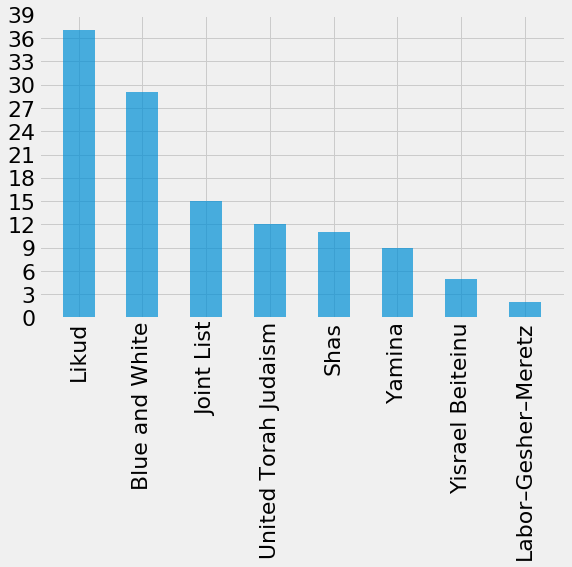

In [62]:
import matplotlib.pyplot as plt
# Creating dictionary of total mandates for each party.
counter_dict = dict(counter)
# Sorting the dictionary, by descending order. 
counter_dict = {k: v for k, v in sorted(counter_dict.items(),reverse=True, key=lambda item: item[1])}

# Plot properties.
plt.figure(figsize=[8.4, 5.2])
plt.bar(range(len(counter_dict)), list(counter_dict.values()), align='center',width=0.5,alpha=0.7)
plt.xticks(range(len(counter_dict)), list(counter_dict.keys()),rotation='vertical')
plt.yticks(np.arange(0, 42, step=3))
plt.show()

# התוצאות מראות שאם הבחירות היו נעשות בפורמט של חלוקת מנדטים למחוזות, כאשר כמות המנדטים לכל מחוז נקבעת על פי אחוזי הצבעה, סביר להניח שדי בקלות הייתה מוקמת ממשלה. שיטה זו יכולה לגרום למצביעים רבים לעודד בעלי זכות הצבעה מסביבתם הפיזית לצאת ולהצביע מכיוון שזה יכול להגדיל בצורה גדולה יותר מאשר בצורת הבחירות הנוכחית את הכוח של המפלגה אליה הם מצביעים עקב הגדלת הכוח של המחוז בו הם נמצאים. בצורה דומה, ייתכן כי הידיעה על כך שמחוזות מסוימים בעלי השקפה פוליטית מסוימת יוצאים להצביע באחוזים רבים, יכולה לעודד מצביעים ממחוזות אחרים בעלי השקפה פוליטית שונה מהם ובעלי אחוזי הצבעה נמוכים יותר בדרך כלל, ללכת להצביע ולעודד את קרוביהם שחולקים עימם השקפה פוליטית דומה לצאת להצביע, מתוך חשש שההשפעה של אלו שכן מצביעים  במקומות אחרים לבסוף תהיה גבוהה יותר, כי הם יקבלו יותר מנדטים בצורה גבוהה יותר מאשר כיום. כמו כן, הידיעה שרק 5 מפלגות בכירות מכל מחוז מקבלות מנדטים עשויה למנוע התמודדות של מפלגות רבות כל כך. זאת מכיוון שבעוד שאחוז החסימה מהווה כמות מסוימת של קולות שנסכמים על פני כל הקלפיות במדינה, בשיטה זו כדי שמפלגה תקבל מנדטים במחוז מסוים עליה להיות בין 5 המפלגות החזקות במחוז ולכן אין לה את היכולת לצבור קולות ממקומות רבים וכך לקבל מנדטים. ייתכן כי אם מפלגות קטנות בעלות השקפות דומות היו מתאחדות, הן היו יכולות להגדיל את כוחן בכל מחוז, ולמנוע עבור עצמן כספי בחירות מבוזבזים, ועבור המצביעים שלהן בזבוז קולות בפועל. ייתכן כי שיטת בחירות שמעודדת אחוזי הצבעה הייתה יכולה להכריע את תוצאות הבחירות יותר בקלות ולמנוע בחירות חוזרות ונשנות.  